**Group Assignment 2: Census Data Exploration**

Ashley Yao
household income profile for Los Angeles

**Importing and Exploring data**

In [18]:
# importing libraries to work with data
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [22]:
# loading in a data file for household income in LA for 2019 - note: could not find a data set that went beyond 1 year
gdf = gpd.read_file('data/acs2019_5yr_B19001_14000US06037534001.geojson')

In [24]:
# preliminary inspection to determine size of data 
# (oh it's incredibly small? I guess it's because it's just one year) that seems incredibly wrong 
# I went to the census data website and apparently this is right? oh it's now fixed
gdf.shape

(2347, 37)

In [25]:
gdf.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,185622.0,3065.0,157633.0,2635.0,135556.0,2423.0,142811.0,2441.0,129873.0,2231.0,138123.0,2419.0,126853.0,2517.0,127576.0,1954.0,116721.0,2408.0,225974.0,3003.0,300644.0,3633.0,408135.0,4079.0,310236.0,3564.0,213893.0,2732.0,258815.0,3306.0,338330.0,4049.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,91.0,65.0,101.0,68.0,44.0,41.0,55.0,45.0,78.0,67.0,67.0,56.0,46.0,37.0,99.0,53.0,99.0,56.0,107.0,56.0,274.0,103.0,151.0,60.0,75.0,48.0,125.0,73.0,77.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,21.0,22.0,0.0,12.0,47.0,48.0,36.0,43.0,25.0,27.0,7.0,11.0,0.0,12.0,52.0,52.0,34.0,25.0,166.0,90.0,298.0,116.0,119.0,63.0,146.0,73.0,115.0,55.0,180.0,74.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,135.0,69.0,278.0,112.0,39.0,41.0,108.0,76.0,169.0,109.0,112.0,74.0,53.0,47.0,178.0,96.0,163.0,78.0,165.0,79.0,261.0,119.0,148.0,96.0,106.0,65.0,53.0,51.0,58.0,59.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,128.0,59.0,124.0,64.0,57.0,41.0,35.0,31.0,94.0,53.0,83.0,42.0,107.0,56.0,83.0,56.0,84.0,43.0,63.0,35.0,122.0,59.0,114.0,51.0,68.0,44.0,69.0,47.0,41.0,32.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [26]:
# making all data visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
#finding maxes
gdf.sample()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
1488,14000US06037502402,"Census Tract 5024.02, Los Angeles, CA",990.0,35.0,48.0,27.0,11.0,12.0,53.0,31.0,21.0,17.0,14.0,14.0,57.0,38.0,25.0,19.0,21.0,20.0,14.0,15.0,82.0,40.0,100.0,48.0,211.0,67.0,91.0,45.0,113.0,49.0,84.0,37.0,45.0,30.0,"MULTIPOLYGON (((-118.09597 33.96939, -118.0958..."


In [29]:
# inspecting data type
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B19001001         2347 non-null   float64 
 3   B19001001, Error  2347 non-null   float64 
 4   B19001002         2347 non-null   float64 
 5   B19001002, Error  2347 non-null   float64 
 6   B19001003         2347 non-null   float64 
 7   B19001003, Error  2347 non-null   float64 
 8   B19001004         2347 non-null   float64 
 9   B19001004, Error  2347 non-null   float64 
 10  B19001005         2347 non-null   float64 
 11  B19001005, Error  2347 non-null   float64 
 12  B19001006         2347 non-null   float64 
 13  B19001006, Error  2347 non-null   float64 
 14  B19001007         2347 non-null   float64 
 15  B19001007, Error  2347 non-null   float64 
 16  B19001008       

In [28]:
# looking at FIPs codes and recognizing 0s
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

**Organizing Data and Renaming Columns**

In [30]:
# dropping index row with totals
gdf = gdf.drop([0])

In [31]:
# checking dropped row
gdf.head ()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,91.0,65.0,101.0,68.0,44.0,41.0,55.0,45.0,78.0,67.0,67.0,56.0,46.0,37.0,99.0,53.0,99.0,56.0,107.0,56.0,274.0,103.0,151.0,60.0,75.0,48.0,125.0,73.0,77.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,21.0,22.0,0.0,12.0,47.0,48.0,36.0,43.0,25.0,27.0,7.0,11.0,0.0,12.0,52.0,52.0,34.0,25.0,166.0,90.0,298.0,116.0,119.0,63.0,146.0,73.0,115.0,55.0,180.0,74.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,135.0,69.0,278.0,112.0,39.0,41.0,108.0,76.0,169.0,109.0,112.0,74.0,53.0,47.0,178.0,96.0,163.0,78.0,165.0,79.0,261.0,119.0,148.0,96.0,106.0,65.0,53.0,51.0,58.0,59.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,128.0,59.0,124.0,64.0,57.0,41.0,35.0,31.0,94.0,53.0,83.0,42.0,107.0,56.0,83.0,56.0,84.0,43.0,63.0,35.0,122.0,59.0,114.0,51.0,68.0,44.0,69.0,47.0,41.0,32.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,78.0,50.0,18.0,19.0,59.0,60.0,33.0,26.0,68.0,48.0,33.0,42.0,17.0,19.0,83.0,56.0,32.0,26.0,86.0,50.0,147.0,65.0,195.0,71.0,137.0,59.0,122.0,47.0,159.0,72.0,178.0,77.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [32]:
# row has been dropped

In [33]:
# dropping unneccessary columns
#listing out columns
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

In [34]:
# columns to keep
columns_to_keep = ['geoid','name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [35]:
# redfining gdf to columns that I'm keeping
gdf = gdf[columns_to_keep]

In [36]:
gdf.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,91.0,101.0,44.0,55.0,78.0,67.0,46.0,99.0,99.0,107.0,274.0,151.0,75.0,125.0,77.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,21.0,0.0,47.0,36.0,25.0,7.0,0.0,52.0,34.0,166.0,298.0,119.0,146.0,115.0,180.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,135.0,278.0,39.0,108.0,169.0,112.0,53.0,178.0,163.0,165.0,261.0,148.0,106.0,53.0,58.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,128.0,124.0,57.0,35.0,94.0,83.0,107.0,83.0,84.0,63.0,122.0,114.0,68.0,69.0,41.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,18.0,59.0,33.0,68.0,33.0,17.0,83.0,32.0,86.0,147.0,195.0,137.0,122.0,159.0,178.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [37]:
#confirmed removal of error columns

In [38]:
#renaming columns
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [39]:
# renaming columns to ordinal values
gdf.columns = ['geoid',
 'name','LA County, CA',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [40]:
# checking new column titles. they have wonky fonts.
gdf.head()

,geoid,name,"LA County, CA","Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,91.0,101.0,44.0,55.0,78.0,67.0,46.0,99.0,99.0,107.0,274.0,151.0,75.0,125.0,77.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,21.0,0.0,47.0,36.0,25.0,7.0,0.0,52.0,34.0,166.0,298.0,119.0,146.0,115.0,180.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,135.0,278.0,39.0,108.0,169.0,112.0,53.0,178.0,163.0,165.0,261.0,148.0,106.0,53.0,58.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,128.0,124.0,57.0,35.0,94.0,83.0,107.0,83.0,84.0,63.0,122.0,114.0,68.0,69.0,41.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,18.0,59.0,33.0,68.0,33.0,17.0,83.0,32.0,86.0,147.0,195.0,137.0,122.0,159.0,178.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [42]:
# checking data integrity. creating random_tract title. executed several times
random_tract = gdf.sample()
random_tract

,geoid,name,"LA County, CA","Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
1401,14000US06037480400,"Census Tract 4804, Los Angeles, CA",2218.0,210.0,34.0,103.0,16.0,14.0,85.0,54.0,99.0,115.0,321.0,120.0,174.0,169.0,144.0,179.0,381.0,"MULTIPOLYGON (((-118.14183 34.10397, -118.1418..."


In [46]:
# practicing use of iloc command
# basically, selects a specific data point you assign
random_tract.iloc[0]['LA County, CA']

2218.0

**Plots and Maps**

In [48]:
# moving onto plotting! in this line we're looking at a single column. this is our totals for the 5 years
gdf['LA County, CA'].head()

1    1575.0
2    1312.0
3    2297.0
4    1357.0
5    1445.0
Name: LA County, CA, dtype: float64

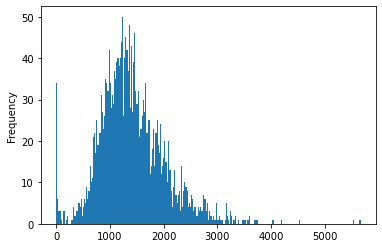

In [53]:
# plotting a histogram that shows each census tract by number on the x axis and reported incomes on frequency
gdf['LA County, CA'].plot.hist(bins=273)

# I would label the axes if I had more time and wasn't rushing

In [58]:
# sorting data for top reported census tract for income
gdf_sorted = gdf.sort_values(by = 'LA County, CA', ascending = False)
gdf_sorted[['geoid','LA County, CA']].head(5)

,geoid,"LA County, CA"
923,14000US06037275602,5663.0
2147,14000US06037702901,5537.0
2107,14000US06037700200,4541.0
547,14000US06037207900,4204.0
2108,14000US06037700300,4033.0


In [60]:
# create new percent columns for map
gdf['Percent Less than $10,000'] = gdf['Less than $10,000']/gdf['LA County, CA']*100
gdf['Percent $200,000 or more'] = gdf['$200,000 or more']/gdf['LA County, CA']*100

In [63]:
# checking for reasonable heads
gdf['Percent Less than $10,000'].head()

1     5.460317
2     5.030488
3    11.797997
4     6.263817
5     5.397924
Name: Percent Less than $10,000, dtype: float64

In [64]:
gdf['Percent $200,000 or more'].head()

1     4.888889
2    13.719512
3     2.525033
4     3.021371
5    12.318339
Name: Percent $200,000 or more, dtype: float64

In [68]:
list(gdf)

['geoid',
 'name',
 'LA County, CA',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry',
 'Percent Less than $10,000',
 'Percent $200,000 or more']

KeyError: 'Pecent $200,000 or more'

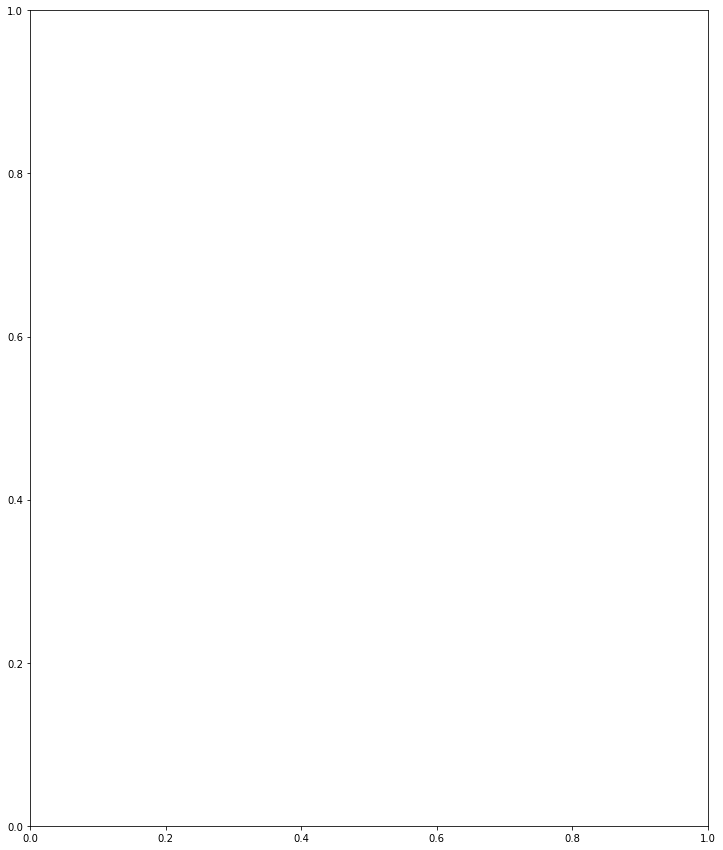

In [82]:
## tried plotting map but I couldn't get it to work before 12

gdf.plot(figsize=(15,15),
        column= 'Pecent $200,000 or more',
        Legend= True,
        scheme= 'Natural Breaks')

In [ ]:
## will work on this